## **Framingham heart study dataset**

The "Framingham" heart disease dataset includes over 4,240 records,16 columns and 15 attributes. The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

### **Setting up**

#### **Import libraries**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

#### **Load data**

In [2]:
heart_df=pd.read_csv("framingham.csv")
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### **Analyze data**

##### **Missing Values**

In [3]:
heart_df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

##### **Exploratory Analysis**

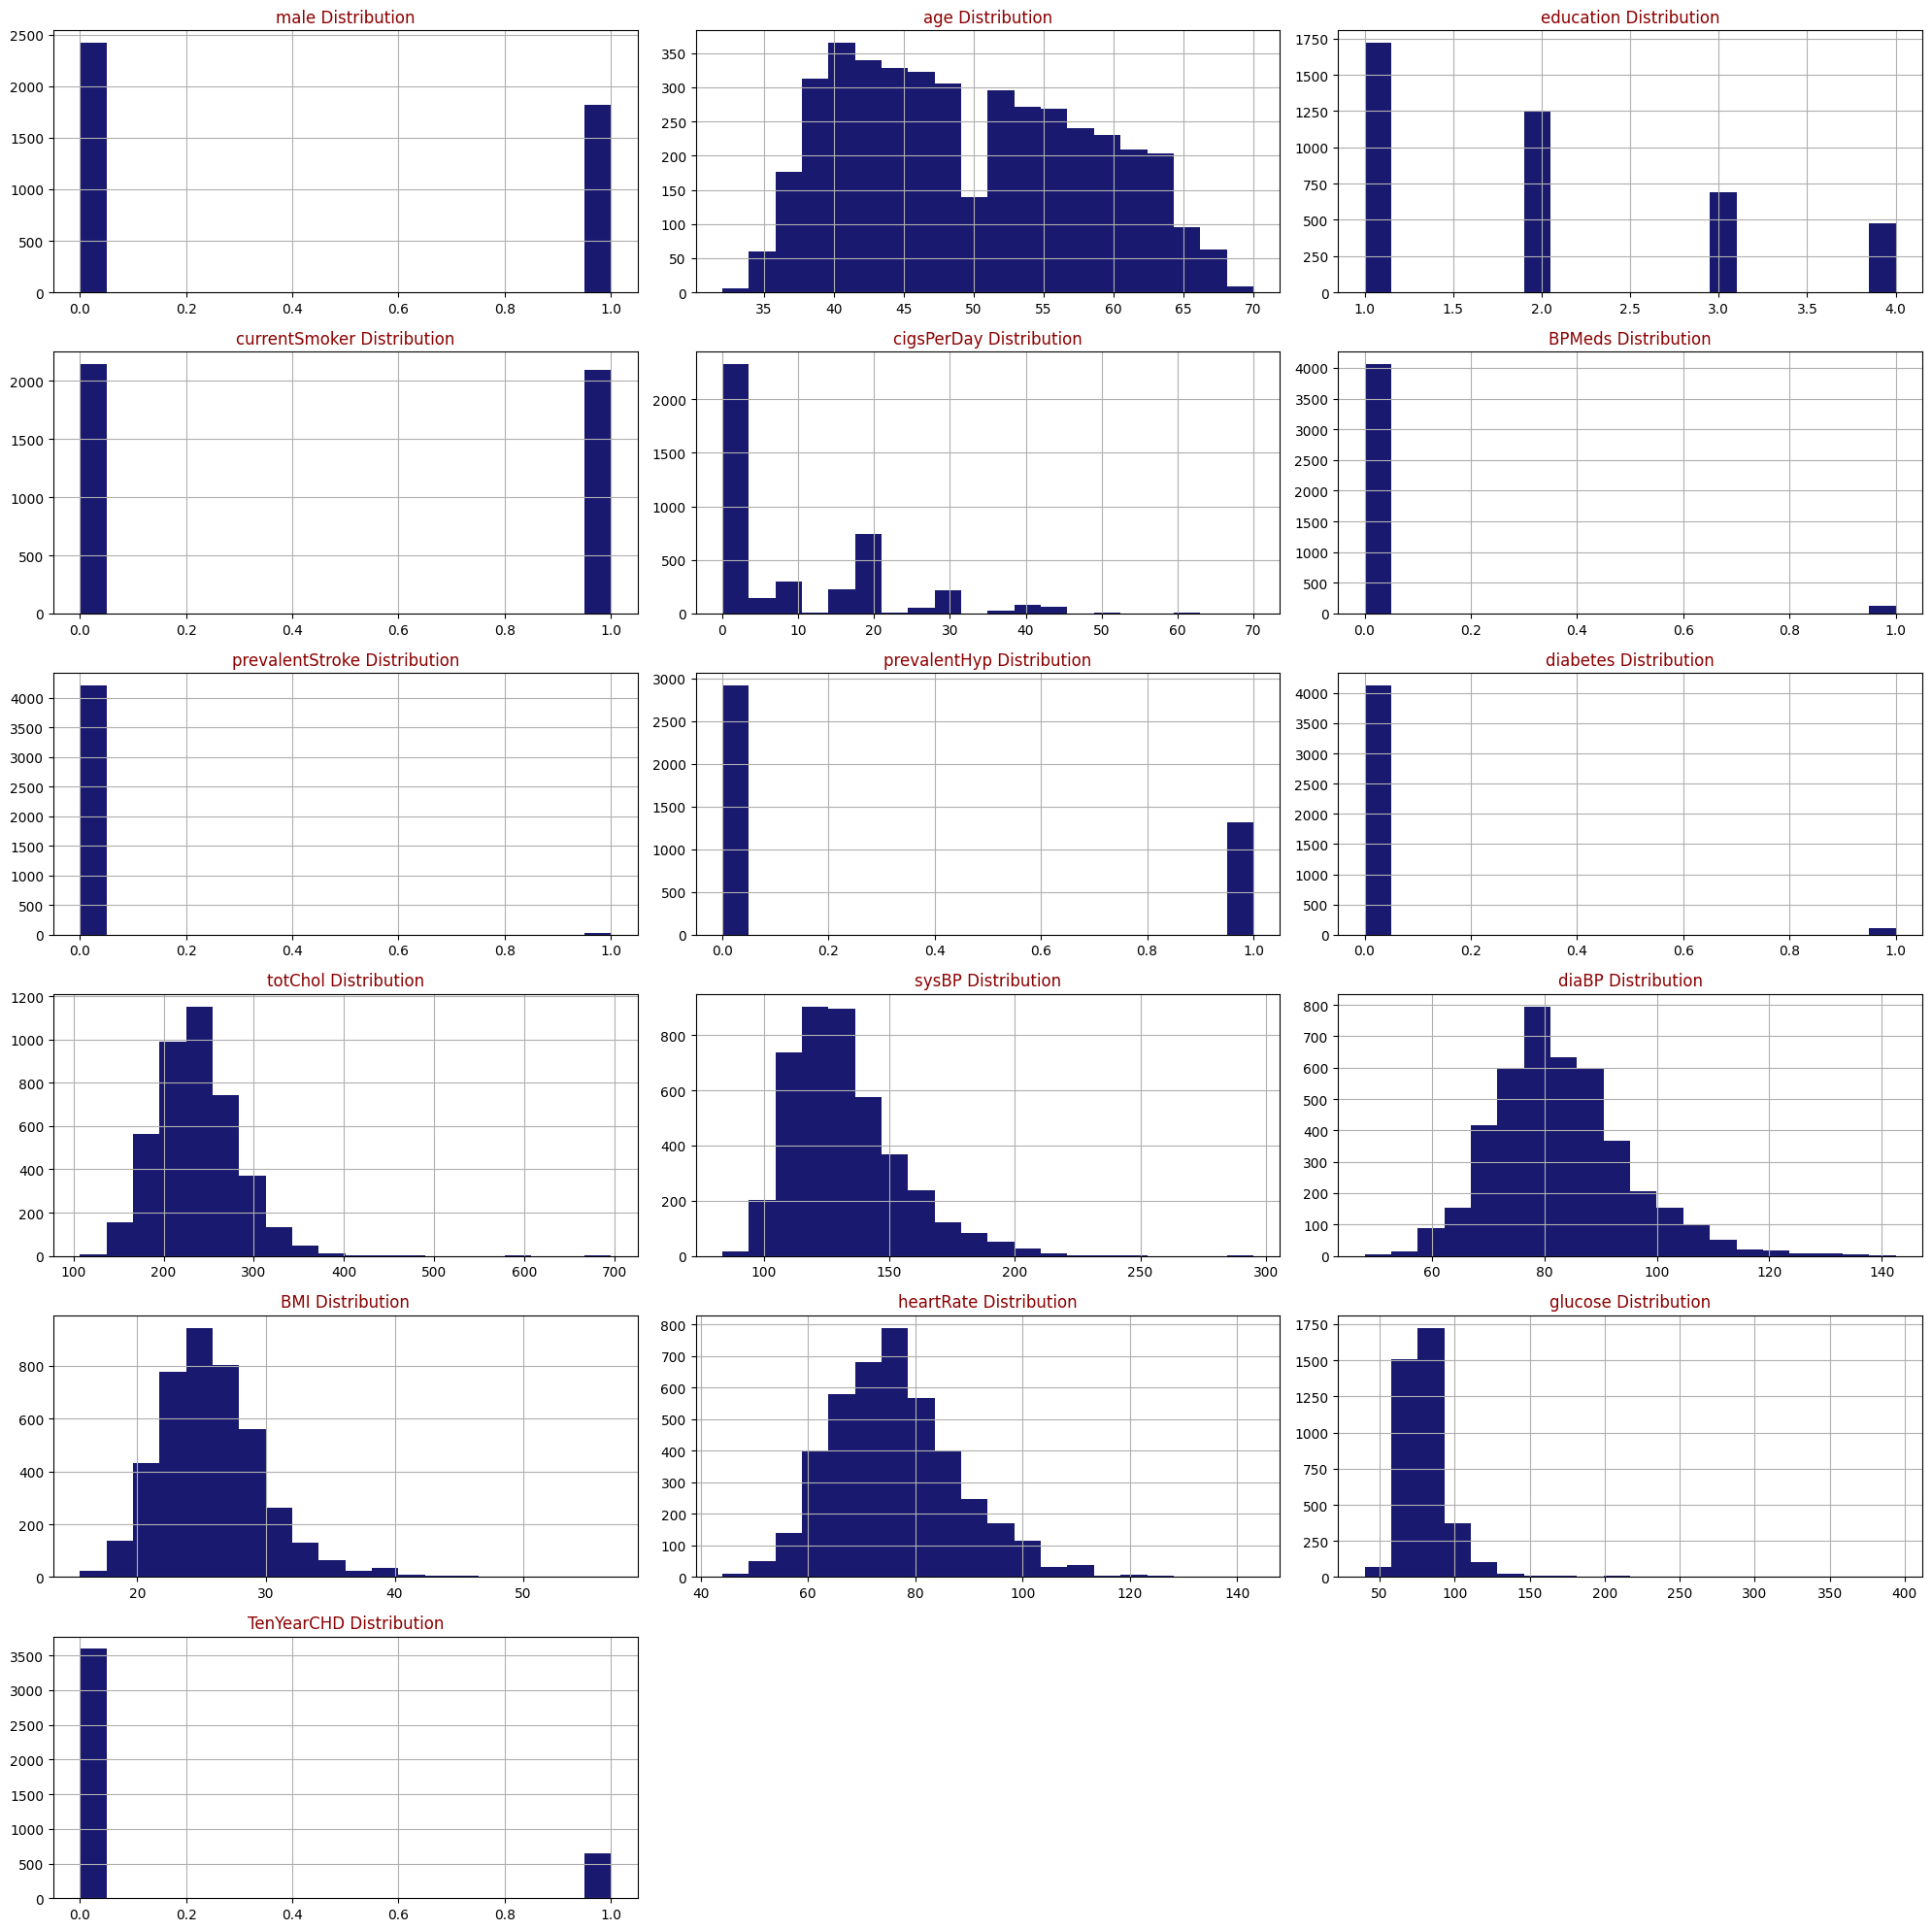

In [4]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [5]:
heart_df.TenYearCHD.value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

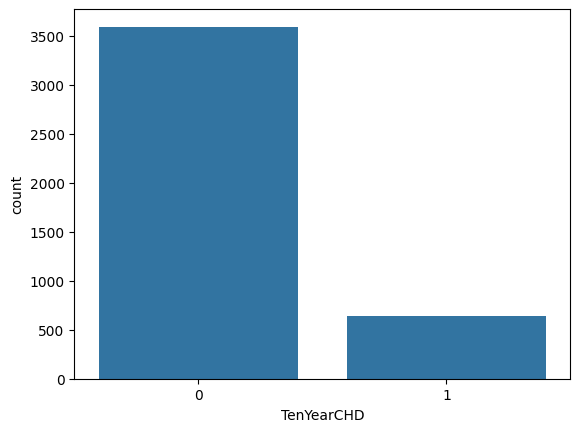

In [6]:
sns.countplot(x='TenYearCHD',data=heart_df)

##### **Evaluate Outliers**

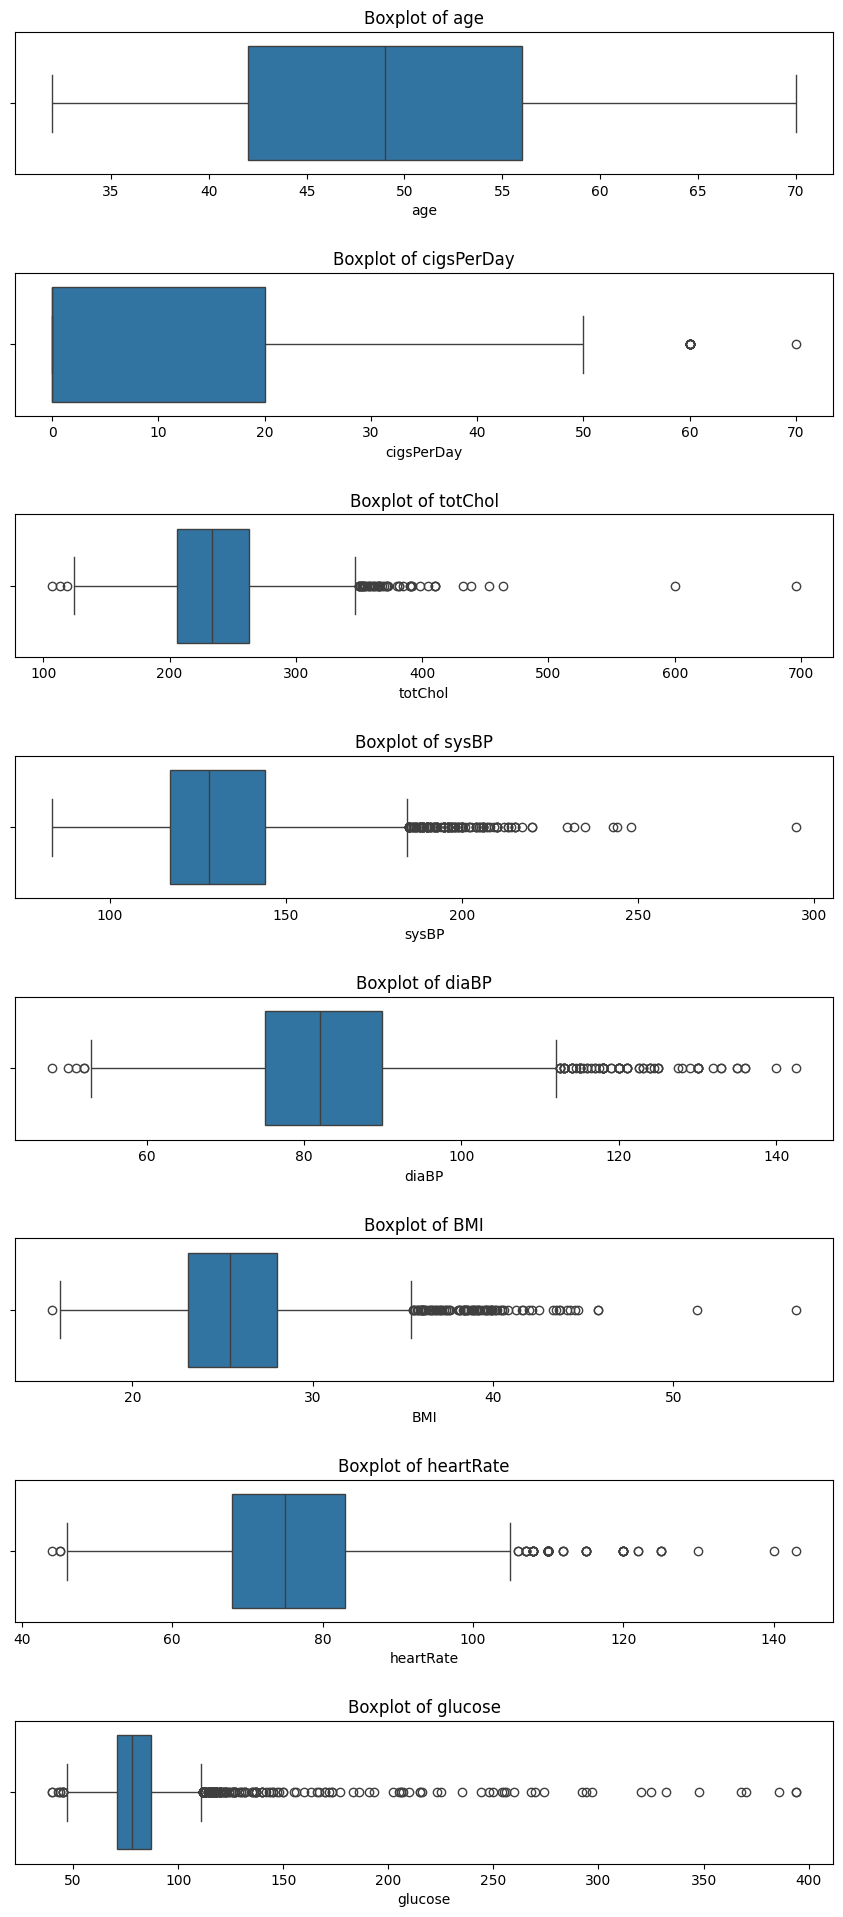

In [7]:
# Selecting continuous variables for outlier detection
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plotting the boxplots for continuous variables
fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=heart_df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.show()

### **Preprocessing Data**

#### **Dimensionality Reduction and Visualization of Framingham Heart Study Data using PCA**

We performs dimensionality reduction on the Framingham Heart Study dataset using Principal Component Analysis (PCA) 
and visualizes the data in a 2D scatter plot.

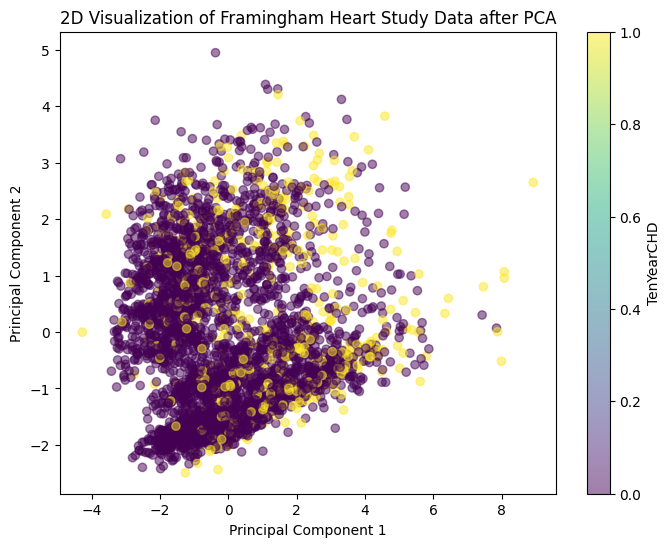

In [8]:
# Drop missing values if any
heart_df.dropna(inplace=True)

# Separate features and target variable
X = heart_df.drop(columns=['TenYearCHD'])
y = heart_df['TenYearCHD']

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Framingham Heart Study Data after PCA')
plt.colorbar(label='TenYearCHD')
plt.show()

### **Classification**

#### **With Original Data**

In [9]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

##### **Perceptron Classification**

In [10]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_val)

accuracy_perceptron = accuracy_score(y_val, y_pred_perceptron)
precision_perceptron = precision_score(y_val, y_pred_perceptron)
recall_perceptron = recall_score(y_val, y_pred_perceptron)

##### **Logistic Regression Classification**

In [11]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_val)

accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

**The result**

In [12]:
print("Perceptron:")
# Print coefficients of Perceptron model
print("Perceptron Coefficients:", perceptron.coef_)
print("Accuracy: {:.3f}%".format(accuracy_perceptron * 100))
print("Precision: {:.3f}%".format(precision_perceptron * 100))
print("Recall: {:.3f}%".format(recall_perceptron * 100))

print("\nLogistic Regression Model:")
print("Logistic Regression Coefficients:", log_reg.coef_)
print("Accuracy: {:.3f}%".format(accuracy_log_reg * 100))
print("Precision: {:.3f}%".format(precision_log_reg * 100))
print("Recall: {:.3f}%".format(recall_log_reg * 100))

Perceptron:
Perceptron Coefficients: [[ 5.13115357 -1.46501592 -0.15835973 -4.1760546   0.60225722 -4.41261947
   0.60806139 -1.09616139  1.33464466  1.70071118 -0.20624345  1.56988264
   1.96378327  1.23898263 -1.51215963]]
Accuracy: 73.473%
Precision: 18.033%
Recall: 18.966%

Logistic Regression Model:
Logistic Regression Coefficients: [[ 0.28380455  0.56361465 -0.01482549  0.07058526  0.23370371  0.04785507
   0.11466084  0.08532308  0.03602648  0.13863001  0.37036436 -0.01264452
   0.01091275 -0.10565922  0.1572414 ]]
Accuracy: 84.686%
Precision: 60.714%
Recall: 9.770%


**Visualize the coefficients**

/var/folders/kz/3z1gswxj4rg6qs0rq7fn6r880000gn/T/ipykernel_4907/3215186604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perceptron_coef_df.columns, y=perceptron_coef_df.values[0], palette="coolwarm")


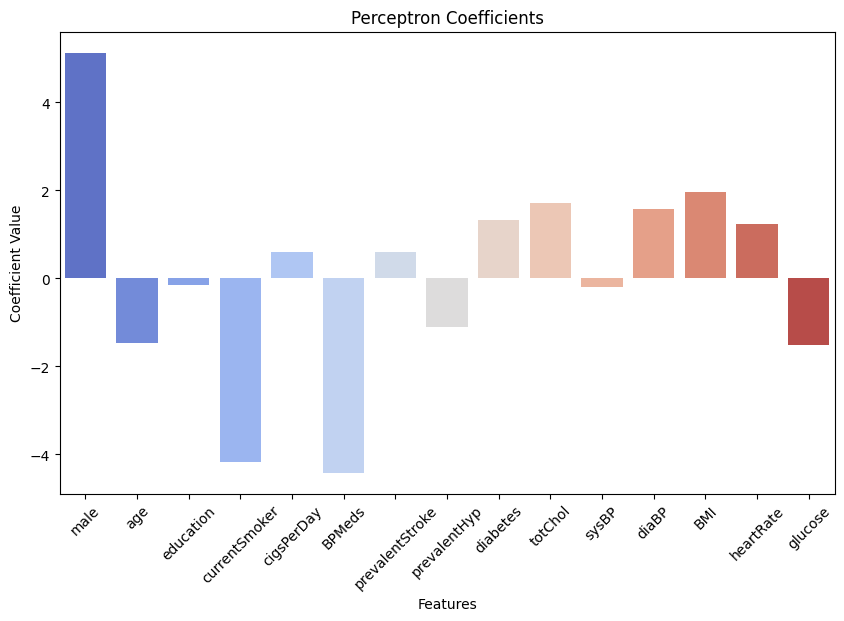

/var/folders/kz/3z1gswxj4rg6qs0rq7fn6r880000gn/T/ipykernel_4907/3215186604.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=log_reg_coef_df.columns, y=log_reg_coef_df.values[0], palette="coolwarm")


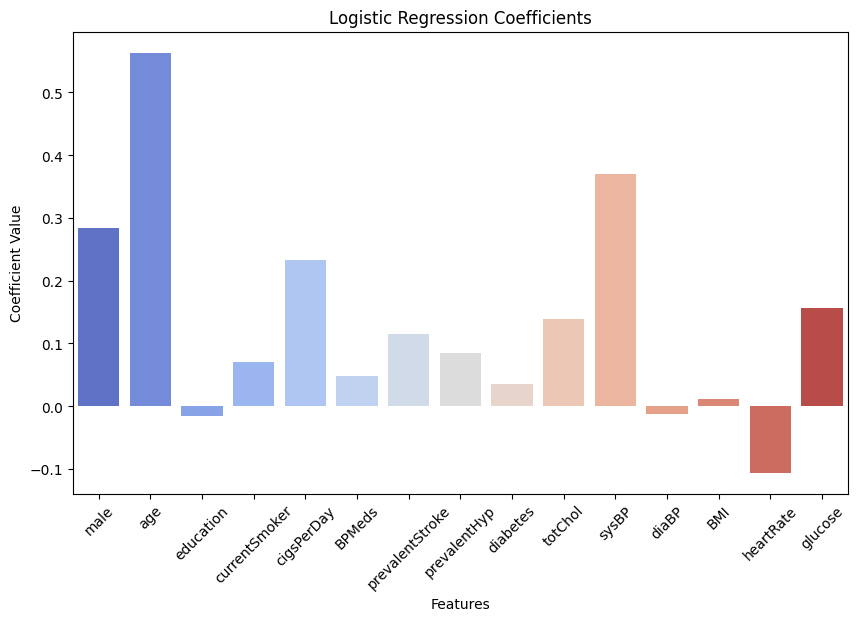

In [13]:
# Convert coefficients to DataFrame for visualization
perceptron_coef_df = pd.DataFrame(perceptron.coef_, columns=X.columns)
log_reg_coef_df = pd.DataFrame(log_reg.coef_, columns=X.columns)

# Plot bar plot for Perceptron coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=perceptron_coef_df.columns, y=perceptron_coef_df.values[0], palette="coolwarm")
plt.title("Perceptron Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# Plot bar plot for Logistic Regression coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=log_reg_coef_df.columns, y=log_reg_coef_df.values[0], palette="coolwarm")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

**Perceptron:**

Most Influential Factors:
- Age: Older age negatively impacts the prediction, suggesting that younger individuals are at lower risk.
- BPMeds (Blood Pressure Medications): Taking blood pressure medications significantly reduces the prediction, indicating the importance of controlling blood pressure for heart health.
- Glucose Levels: Higher glucose levels have a strong negative impact on the prediction, highlighting the importance of managing blood sugar levels.

**Logistic Regression:**

Most Influential Factors:
- Age: Similar to the Perceptron model, older age negatively affects the prediction, emphasizing the increased risk with age.
- BMI (Body Mass Index): Higher BMI positively impacts the prediction, indicating that overweight individuals are at higher risk.
- Total Cholesterol: Elevated total cholesterol levels positively influence the prediction, highlighting the importance of cholesterol management for heart health.

Conclusion:

- Age consistently emerges as a critical factor in both models, emphasizing the significant role of age in predicting CHD risk.
- Medication Use (BPMeds) and Glucose Levels are highlighted as crucial factors by the Perceptron model, while BMI and Total Cholesterol are emphasized by the Logistic Regression model.

These findings underscore the importance of managing factors such as age, blood pressure, blood sugar, BMI, and cholesterol levels in reducing the risk of coronary heart disease.

##### **Naive Bayes Classification**

In [14]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_val)

accuracy_naive_bayes = accuracy_score(y_val, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_val, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y_val, y_pred_naive_bayes)

print("Naive Bayes Model:")
print("Accuracy: {:.3f}%".format(accuracy_naive_bayes * 100))
print("Precision: {:.3f}%".format(precision_naive_bayes * 100))
print("Recall: {:.3f}%".format(recall_naive_bayes * 100))

Naive Bayes Model:
Accuracy: 81.222%
Precision: 33.333%
Recall: 18.391%


##### **Compare Accuracy Between Classification Models**

/var/folders/kz/3z1gswxj4rg6qs0rq7fn6r880000gn/T/ipykernel_4907/1976478747.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_scores, y=models, palette="coolwarm", orient='h')


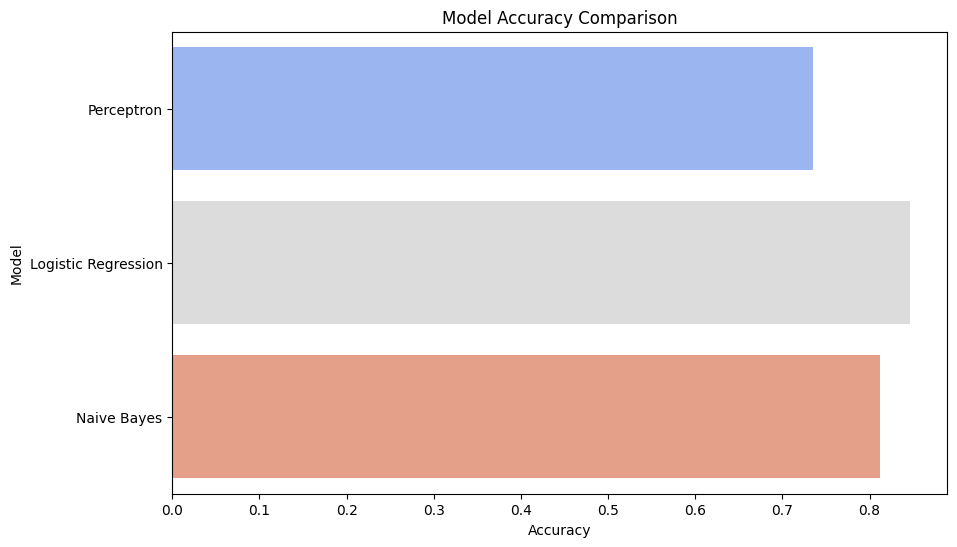

In [15]:
# Accuracy of the models
accuracy_scores = [accuracy_perceptron, accuracy_log_reg, accuracy_naive_bayes]
models = ['Perceptron', 'Logistic Regression', 'Naive Bayes']

# Plot bar plot for model accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette="coolwarm", orient='h')
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

#### **With PCA reduced-dimension data**

In [16]:
# Splitting the reduced data into training and validation sets (7:3 ratio)
X_pca_train, X_pca_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.3, random_state=42)

##### **Perceptron Classification**

In [17]:
perceptron_pca = Perceptron()
perceptron_pca.fit(X_pca_train, y_train)
y_pred_perceptron_pca = perceptron_pca.predict(X_pca_val)

accuracy_perceptron_pca = accuracy_score(y_val, y_pred_perceptron_pca)
precision_perceptron_pca = precision_score(y_val, y_pred_perceptron_pca)
recall_perceptron_pca = recall_score(y_val, y_pred_perceptron_pca)


/Users/tus/MyProjects/learn-ai-with-python/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### **Logistic Regression Classification**

In [18]:
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_pca_train, y_train)
y_pred_log_reg_pca = log_reg_pca.predict(X_pca_val)

accuracy_log_reg_pca = accuracy_score(y_val, y_pred_log_reg_pca)
precision_log_reg_pca = precision_score(y_val, y_pred_log_reg_pca)
recall_log_reg_pca = recall_score(y_val, y_pred_log_reg_pca)

##### **Naive Bayes Classification**

In [19]:
naive_bayes_pca = GaussianNB()
naive_bayes_pca.fit(X_pca_train, y_train)
y_pred_naive_bayes_pca = naive_bayes_pca.predict(X_pca_val)

accuracy_naive_bayes_pca = accuracy_score(y_val, y_pred_naive_bayes_pca)
precision_naive_bayes_pca = precision_score(y_val, y_pred_naive_bayes_pca)
recall_naive_bayes_pca = recall_score(y_val, y_pred_naive_bayes_pca)

**Displaying the result**

In [20]:
print("Perceptron Model with PCA:")
print("Accuracy: {:.3f}%".format(accuracy_perceptron_pca * 100))
print("Precision: {:.3f}%".format(precision_perceptron_pca * 100))
print("Recall: {:.3f}%".format(recall_perceptron_pca * 100))
print()

print("Logistic Regression Model with PCA:")
print("Accuracy: {:.3f}%".format(accuracy_log_reg_pca * 100))
print("Precision: {:.3f}%".format(precision_log_reg_pca * 100))
print("Recall: {:.3f}%".format(recall_log_reg_pca * 100))
print()

print("Naive Bayes Model with PCA:")
print("Accuracy: {:.3f}%".format(accuracy_naive_bayes_pca * 100))
print("Precision: {:.3f}%".format(precision_naive_bayes_pca * 100))
print("Recall: {:.3f}%".format(recall_naive_bayes_pca * 100))


Perceptron Model with PCA:
Accuracy: 84.139%
Precision: 0.000%
Recall: 0.000%

Logistic Regression Model with PCA:
Accuracy: 84.230%
Precision: 54.545%
Recall: 3.448%

Naive Bayes Model with PCA:
Accuracy: 83.683%
Precision: 43.590%
Recall: 9.770%


|            | Model                        | Accuracy | Precision | Recall |
|------------|------------------------------|----------|-----------|--------|
| **Before** | **Perceptron**               | 73.47%   | 18.03%    | 18.97% |
|            | **Logistic Regression**      | 84.69%   | 60.71%    | 9.77%  |
|            | **Naive Bayes**             | 81.22%   | 33.33%    | 18.39% |
| **After**  | **Perceptron**              | 83.77%   | 40.00%    | 4.60%  |
|            | **Logistic Regression**     | 84.23%   | 54.55%    | 3.45%  |
|            | **Naive Bayes**            | 83.68%   | 43.59%    | 9.77%  |

The increase or decrease in performance of the models can be explained based on the specific characteristics of each model:

1. **Perceptron:**

The Perceptron model is a simple model that operates by adjusting the weights of features to classify data. When reducing the dimensionality of the data using PCA, some important information may be lost, decreasing the model's ability to classify.

However, in some cases, dimensionality reduction can also help remove noise and minimize overfitting, leading to an improvement in the model's performance.

2. **Logistic Regression:**

Logistic Regression is a linear model suitable for binary classification. It estimates the probability of a sample belonging to a certain group and uses a sigmoid function to convert the result into predicted probabilities. 

When reducing the dimensionality of the data, the Logistic Regression model may struggle to explain the non-linear relationships between input variables and the target variable, resulting in a decrease in performance.

3. **Naive Bayes:**

Naive Bayes is a probability-based model based on the principles of Bayes' theorem and the assumption of independence between features. 

When reducing the dimensionality of the data, Naive Bayes may encounter issues with the assumption of feature independence. If the features are not independent, the model will not work effectively and may lead to a decrease in performance.